1. Columns selected

['patent_number', 'uspc_mainclass_id', 'uspc_mainclass_title',
       'patent_date', 'patent_title', 'patent_year', 'app_number', 'app_type',
       'assignee_country', 'assignee_first_name', 'assignee_first_seen_date',
       'assignee_id', 'assignee_last_name', 'assignee_organization',
       'assignee_type', 'cited_patent_category', 'cited_patent_date',
       'cited_patent_kind', 'cited_patent_number', 'cited_patent_sequence',
       'cited_patent_title', 'citedby_patent_category', 'citedby_patent_date',
       'citedby_patent_kind', 'citedby_patent_number', 'citedby_patent_title',
       'inventor_country', 'inventor_first_name', 'inventor_id',
       'inventor_last_name', 'inventor_sequence', 'uspc_subclass_id',
       'uspc_subclass_title', 'wipo_field_id', 'wipo_field_title',
       'wipo_sector_title']

In [2]:
#SET UP
import pandas as pd
import numpy as np

columns = ['patent_number', 'uspc_mainclass_id', 'uspc_mainclass_title', 'patent_date', 'patent_title', 
                 'patent_year', 'app_number', 'app_type', 'assignee_country', 'assignee_first_name', 
                 'assignee_id', 'assignee_last_name', 'assignee_organization', 
                 'assignee_type', 'cited_patent_category', 'cited_patent_date', 'cited_patent_kind',
                 'cited_patent_number', 'cited_patent_sequence', 'cited_patent_title', 'citedby_patent_category', 
                 'citedby_patent_date', 'citedby_patent_kind', 'citedby_patent_number', 'citedby_patent_title', 
                 'inventor_country', 'inventor_first_name', 'inventor_id', 'inventor_last_name', 'inventor_sequence', 
                 'uspc_subclass_id', 'uspc_subclass_title', 'wipo_field_id', 'wipo_field_title', 'wipo_sector_title']

#Reading the datasets ordered by year of patent granted
df_2004 = pd.read_csv('patent2004.csv', low_memory=False)
df_2005 = pd.read_csv('patent2005.csv', low_memory=False)
df_2006 = pd.read_csv('patent2006.csv', low_memory=False)
df_2007 = pd.read_csv('patent2007.csv', low_memory=False)
df_2008 = pd.read_csv('patent2008.csv', low_memory=False)
df_2009 = pd.read_csv('patent2009.csv', low_memory=False)
df_2010= pd.read_csv('patent2010.csv', low_memory=False)
df_2011= pd.read_csv('patent2011.csv', low_memory=False)
df_2012= pd.read_csv('patent2012.csv', low_memory=False)
df_2013= pd.read_csv('patent2013.csv', low_memory=False)




In [15]:
#Secondary dataset for further processing
assignee = pd.read_csv('assignee_patents.csv',low_memory=False)


## Filtering the data

Selecting only the columns needed to create features


In [3]:
#Selecting the columns need to create the features
df2004 = df_2004[columns]
df2005 = df_2005[columns]
df2006 = df_2006[columns]
df2007 = df_2007[columns]
df2008 = df_2008[columns]
df2009 = df_2009[columns]
df2010 = df_2010[columns]
df2011 = df_2011[columns]
df2012= df_2012[columns]
df2013= df_2013[columns]

In [4]:
df2005.head()

,patent_number,uspc_mainclass_id,uspc_mainclass_title,patent_date,patent_title,patent_year,app_number,app_type,assignee_country,assignee_first_name,...,inventor_country,inventor_first_name,inventor_id,inventor_last_name,inventor_sequence,uspc_subclass_id,uspc_subclass_title,wipo_field_id,wipo_field_title,wipo_sector_title
0,6837925,106,Compositions: coating or plastic,2005-01-04,"Coloring pearlescent flake pigment, manufactur...",2005,10447276,10,JP,None,...,JP,Yasushi,4340697-2,Kubo,0,106/486,Clay or material derived therefrom containing,14,Organic fine chemistry,Chemistry
1,6837925,106,Compositions: coating or plastic,2005-01-04,"Coloring pearlescent flake pigment, manufactur...",2005,10447276,10,JP,Yasushi,...,JP,Hideji,5244731-5,Kagawa,1,106/415,"Mica, shell, scale, platelet, or lamellate",19,Basic materials chemistry,Chemistry
2,6837925,106,Compositions: coating or plastic,2005-01-04,"Coloring pearlescent flake pigment, manufactur...",2005,10447276,10,JP,None,...,JP,Yasushi,4340697-2,Kubo,0,106/416,Clay containing or derived therefrom,14,Organic fine chemistry,Chemistry
3,6837925,106,Compositions: coating or plastic,2005-01-04,"Coloring pearlescent flake pigment, manufactur...",2005,10447276,10,JP,None,...,JP,Yasushi,4340697-2,Kubo,0,106/468,"Clay or material derived from clay containing,...",14,Organic fine chemistry,Chemistry
4,6837925,106,Compositions: coating or plastic,2005-01-04,"Coloring pearlescent flake pigment, manufactur...",2005,10447276,10,JP,None,...,JP,Yasushi,4340697-2,Kubo,0,106/487,Organic material containing,14,Organic fine chemistry,Chemistry


## Joining the datasets

In [6]:
frames = [df2004,df2005, df2006, df2007,df2008,
          df2009,df2010,df2011,df2012,df2013]
patentdf = pd.concat(frames)
print("Numero de fila en el dataset",patentdf['patent_number'].unique().size)

Numero de fila en el dataset 38513


## Preprocessing: Generating the features

### Input Features

#### Base of Scientific Knowledge

We measure the life cycle of a patent by calculating the mean age of all cited patents and also by calculating the number of backward citations by said patent.

Two features.

In [7]:
def bsk_processing(patent):
    #Grouping by patent
    patent_number = patent['patent_number'].unique()

    #Creating the returning DF
    ultimate_df = pd.DataFrame()

    for pnumber in patent_number:
        temp= patent.loc[(patent.patent_number==pnumber)]
        
        
        
        #Calculating the mean age of cited patents
        mask = (temp['cited_patent_date'] != 'None')
        temp_df_valid = temp[mask]

        if(temp_df_valid.size !=0):
            TCT = np.mean(pd.DatetimeIndex(temp_df_valid['cited_patent_date']).year).astype(int)
        else:
            TCT = 0
        
        #Calculating the number of cited patents for current patent
        mask = (temp['cited_patent_number'] != 'None')
        temp = temp[mask]
        if(temp_df_valid.size >0):
            base_knowledge = len(temp['cited_patent_number'].unique())
        else:
            base_knowledge = 0
        
        ultimate_df = ultimate_df.append({'patent_number' : pnumber,
                                          'PK':base_knowledge,
                                          'TCT':TCT
                                             },ignore_index=True)

    return ultimate_df

### Coverage of the Patent

To represent the coverage of a patent we create three features. The first one is the numerical value of the mainclass of the patent, then we take into consideration the total number of classes to which a patent belongs. The third feature represents the number of countries to which the patent belongs since important patents might the registered in multiple countries.

Four features.

In [8]:
def cvrg_processing(patent):
    #Grouping by patent
    patent_number = patent['patent_number'].unique()

    #Creating the returning DF
    ultimate_df = pd.DataFrame()

    for pnumber in patent_number:
        temp= patent.loc[(patent.patent_number==pnumber)]
        
        #Numerical value of the main field of the patent
        main_field=temp['uspc_mainclass_id'].value_counts()
        MF=int(main_field.idxmax())
        
        #Number of classes to which the patent belongs
        TS = len(temp['uspc_mainclass_id'].unique())
        #Number of subclasses to which the patent belongs
        TSC = len(temp['uspc_subclass_id'].unique())
        
        #Number of countries in which the patent has been registered
        countries=len(temp['assignee_country'].unique())
        
        ultimate_df = ultimate_df.append({'patent_number' : pnumber,
                                          'MF' : MF,
                                          'TS' : TS,
                                          'TSC' : TSC,
                                          'CS' : countries
                                          
                                             },ignore_index=True)

    return ultimate_df

### Development

We clasify the patents by calculating the number of inventors involved in the development of the final result, and by knowing through a binary value if the patent is a product of more than one assignee for collaboration purposes.

In [9]:
def dev_processing(patent):
    #Grouping by patent
    patent_number = patent['patent_number'].unique()

    #Creating the returning DF
    ultimate_df = pd.DataFrame()

    for pnumber in patent_number:
        temp= patent.loc[(patent.patent_number==pnumber)]
        
        #Number of inventors
        total_inventors = len(temp['inventor_id'].unique())
        
        #Binary value
        #describing if a patent was created in 
        #collaboration with multiple assignees
        assignee_total = len(temp['assignee_organization'].unique()) 
        col=int(assignee_total>1) #1 if true, 0 if false
        
        ultimate_df = ultimate_df.append({'patent_number' : pnumber,
                                          'INV' : total_inventors,
                                          'COL' : col
                                          
                                             },ignore_index=True)

    return ultimate_df

### Capabilities of Assignee

In [10]:
#Grouping by patent
patent_number = df2004['patent_number'].unique()

    #Creating the returning DF
ultimate_df = pd.DataFrame()
temp= df2004.loc[(df2004.patent_number==patent_number[10])]
        
assignee_per_patent = temp['assignee_id'].unique()


In [211]:
print(assignee_per_patent)
print("Total patents published by assignee:",assignee.loc[(assignee.assignee_id == assignee_per_patent[0])]['assignee_total_patent'].values[0])

['org_MHxJAm3jPNshYAuxt5sE']
Total patents published by assignee: 47


In [226]:
df2004['patent_number'].unique().size

3228

In [11]:
def cap_processing(patent,assignee):
    #Grouping by patent
    patent_number = patent['patent_number'].unique()

    #Creating the returning DF
    ultimate_df = pd.DataFrame()

    for pnumber in patent_number:
        temp= patent.loc[(patent.patent_number==pnumber)]
        assignee_per_patent = temp['assignee_id'].unique()
        #print(assignee_per_patent)
        if(assignee_per_patent.size>0):
            total_patents=0
            for i in range(0,len(assignee_per_patent)):
                if(assignee_per_patent[i]=='None'):
                    total_patents = total_patents+1
                else:
                    total_patents =total_patents + assignee.loc[(assignee.assignee_id == assignee_per_patent[0])]['assignee_total_patent'].values[0]
        else:
            total_patents=1
        
        
        ultimate_df = ultimate_df.append({'patent_number' : pnumber,
                                          'TKW' : total_patents
                                          
                                             },ignore_index=True)

    return ultimate_df

In [224]:
cap_processing(df2004,assignee)

['org_KxZ3HTRr4pbxzJ4RHkWn']
['org_goUkljX0t1kU8cz0riJC']
['org_7K5X2p6S6chDc9Ofw4KJ']
['org_nCiTEwZrfiaYXclgVU8h']
['org_t4X7LIDDdhCj4kcI4Lii']
['org_DLMZGWJ0JHWMNioQ7woC']
['org_YE1ma3ImLKtEzCYYVNlI']
['org_BR269DeL42QFzuSDP6xq']
['org_saQhRz2IGa0Jn68tq6M3']
['org_FcHga3kuKz0sUrouj8X5']
['org_MHxJAm3jPNshYAuxt5sE']
['org_iL4vicUQTInaZg6gMJ1k']
['org_E3dkJE6ZtUg2lUw01bIC' 'org_saQhRz2IGa0Jn68tq6M3']
['org_T1rifBvqxBVK2QGzxTke']
['org_91eATIr2P9SEwFfdIrSx']
['org_bQ1OqXnaKHvCkZit48l7']
['org_Qj16KQZNkQhjnFntUhXt']
['org_Y0fvf7e6aH2iqcYPCx2N']
['org_NA0Yk9r5nx5908EmxOzP']
['None']
['org_FpEkp1WC1iRMs3D9Ftua']
['org_qw9c23tPzEIlc3k4OZek']
['org_Fh80nJSnhb5JvDWxysVv']
['org_lTkJtXZUbl5n718HahKN']
['org_nF0Z1feqAMgGVoNvPdJQ']
['org_XeKaoPi47bLucmAuorC8']
['org_V7PwAqqvb57rTFcBLTB2']
['org_aUn1jCmsG2UIDej9uMvA' 'org_MWMKFPjmGfvzPMjrHYVN']
['org_1TTPNIe7PT8c7EG5onNq']
['org_1BYCSN4VdRBLeH2Rzv5O']
['org_0cpDRUdT76bGhuXrsoCQ' 'org_ulsWFbaD0S2iDophFHHV']
['org_zh1aSbgQluRq2pBfika8']
['org_33Mqb

['org_UHCEdZMs9xD6qTGMo74B']
['org_vlTwP6sqyNDhenWRjhF0']
['org_J4Hjbj6tZj2ZEmAmIqIk']
['None']
['None']
['org_5GoRbpfKQS6m997ZkwOb' 'org_c6DxNwlOX04VWoD9QlT5'
 'org_JMyb4xT71Nk4y3VWc9Xv' 'org_TzQPRhbm0XOXSXVZDIhb']
['org_GeIaDb0iDFL2J6MapgMP']
['org_51gb9Jb06jzr2PvEScpn']
['org_vlTwP6sqyNDhenWRjhF0']
['org_qiAyjwV8fHQeGTeyxF8B']
['org_GsDHEX5VW7juAAZrVHcB']
['org_EC3HQJeRIvBq8LqGfvjo']
['org_kFUAGspke4QLNlcC1Apg']
['org_goUkljX0t1kU8cz0riJC']
['org_168zEoeGHWqu17miyFuZ']
['org_168zEoeGHWqu17miyFuZ']
['org_HISQZFx1lcVVHOBYRoTZ']
['org_swlXXQ5a4gh2YFE5uq3J']
['org_YE1ma3ImLKtEzCYYVNlI']
['None']
['org_3zGvFOoe2XYmIyAOOLJ4']
['org_2k5RlyJHOu0tFr1RwiOm']
['org_HGL4RwYZHETs4wElYJDq']
['None']
['org_mcSgXli421YEAPfuNJoR']
['org_ZKlSLkqgDH53F6ZGhUwV']
['org_K38owi0RM13siqKFdUCH']
['org_saQhRz2IGa0Jn68tq6M3']
['org_ktZZUba8nQeqAW780iDi']
['org_bdXEgUOJE4kidLR7iq0k']
['org_7ON4nlINg1nuyWj0Ykni']
['org_7B7NR6krPrrjtdegzuwz' 'org_XEgRdSstInN29dHsrlKL']
['org_0WOySJHfPSxZcPBZUspt']
['org_T1rifBvq

['org_f1X6FGxBBD4D1PSxGDRb']
['org_f1X6FGxBBD4D1PSxGDRb']
['org_3zGvFOoe2XYmIyAOOLJ4']
['org_f1X6FGxBBD4D1PSxGDRb']
['None']
['org_vAgTsOwRaewrY5yyX6f9']
['org_2PGcXIHW7qFIktGt0ska']
['org_Jhv7bwvXE9dDkb2fKAaM']
['org_abp3zt3sgB3Llmn21AtX']
['org_bQDyYtloS3hgidsveTnd']
['org_YfNhsnnyIuA46kSKa17y']
['org_nF0Z1feqAMgGVoNvPdJQ']
['org_WKtGzpJcRSnUKuGImPVi']
['org_jjdwt2dfUEubExeD5MTp']
['org_saQhRz2IGa0Jn68tq6M3']
['org_joxDnXrbuyq22CVczpFY']
['org_UjyErYCkTCeqCpAZy4Jd']
['org_bR4mqOUYgNxVRS0qXK7t']
['org_f1X6FGxBBD4D1PSxGDRb']
['org_f1X6FGxBBD4D1PSxGDRb']
['org_3UoO79wjtInZe7HujeDi']
['None']
['org_JzhVw8Q6GRCC0NmaTtVo']
['org_1dQOAOHHQZYL4fDyPg0D']
['org_wP6Dy9Db7PRvMdx8T1Ol']
['org_Q2CUS6OlKl461i0cJ1zA']
['org_c3xiR1PXut1LZo0aaul9']
['None']
['None']
['org_E3dkJE6ZtUg2lUw01bIC']
['org_jVku1505Qx0YdwEMNhnB' 'org_S4T4s1Y5bPRCj2bviOBg']
['org_HAHMaFfQUsCY4ljkZ7Po']
['None']
['org_6A1YjMYNYqnKg3yEACym']
['org_3cp5iK9wzZ3XjJr2gAuR']
['org_4DPqdL8a5fIWy3noad4S']
['org_pODIstE01wTwU2xo1tIu']


['org_PZyNGE61kIxM6aOYgQO5']
['org_QRFCk3CnIaY3rYCGjjhV']
['org_JNlWvIwenMSz25Eyg32w']
['org_5JyzD0OrAN4VkENG30r4']
['org_839yrfYL8J12LcdvBhuN']
['org_i4nKp3ZaiIbbgDX6QMQq']
['None']
['org_al5WVEOSHAaTgwY7nFbW']
['org_zqynZU7oBgg0pJjHlQ3d']
['org_KXcs1eKQx8agl2JSDkbc']
['org_C4WLLjbpxspUyx7EC5Gk']
['org_ePn536XNr1ulM4ZiCjVA']
['org_WKtGzpJcRSnUKuGImPVi']
['org_WKtGzpJcRSnUKuGImPVi']
['org_1k1WP25kX5HGUNO2gg7m']
['org_LfucspgNvJi2c0ZW5rjK']
['org_9g4ul1yFL2V7zrnOoKFZ']
['org_4KIAZCVq8RYKiETFToxr']
['org_d8jlRb1j1oChNewTUHR6']
['org_NiZOnDw1Fnxe4opboOSz']
['org_kTWHk7Q1MixynxNFzYyJ']
['None']
['org_sJNIY5uXP8ODTIdIHENQ']
['org_sVCmzfPMxkiP9OjXkMWT']
['org_aAJrNazIiasMuCXiXPry' 'org_Sb2D01MXFCHyXQp1lAcP']
['org_N2EiLxrk1rNoKZcJkHSp']
['org_IBWgmF0K6v4MtxERMZhe']
['org_uYfqov7jMQYDZvzMG0qN' 'per_HaIqaxHDxlR1es2Y1kbi']
['org_clFZINKOzeC5vghy1VLa']
['org_BBKp7fBjoNkBLLqOfnwE']
['org_H3ph6MeScCmROPWze9Ii']
['org_168zEoeGHWqu17miyFuZ']
['org_fA1n08tPYsxXPyaoiTA0']
['org_5jyTXkaQKiyiUNVNS9gm']


['org_loP7SQoJR1GLTmXQJoQo']
['org_E3dkJE6ZtUg2lUw01bIC']
['None']
['org_6Zx1V3z2uvx94kz2SF4A' 'org_YLI0Lm5RlXAowQGEiikb']
['org_IU0nox3fqnqWICFdtBz4']
['org_Ra7VPEm005DdjYxWXdah']
['org_7K5X2p6S6chDc9Ofw4KJ']
['org_wcJD51IGpwBWSgXuoOde']
['org_q3c7BneBwRIx0Yzmh3ss']
['org_XeKaoPi47bLucmAuorC8']
['org_q3c7BneBwRIx0Yzmh3ss']
['org_V4FcY298k8cYXafBinEq']
['org_PZeefC1WSBwTkJd1diT1']
['org_168zEoeGHWqu17miyFuZ']
['org_7laLuBjCoTzyBJ1Syuo2']
['org_lVZuz1nNltH71bf4j6q4']
['org_J3npLNkitM7auZnVX6IX' 'org_S4T4s1Y5bPRCj2bviOBg']
['org_0uWKxWVqsEJx3sIg4Bn6']
['org_8Py8i04PVUDsmJNb9s7s']
['org_bArU5swZlzHT2NHyemJQ']
['org_CJXRKlS2Cd2hyGyYVSSH']
['org_apOOTlGIaURDTo82VFhQ']
['org_0uWKxWVqsEJx3sIg4Bn6']
['org_KZxnCORxS6Fp6maO66KB']
['None']
['org_3pxo8p76KLbFvYAvVkCA']
['org_i4nKp3ZaiIbbgDX6QMQq']
['org_Uc8jE0UyrLyJorASmxLR']
['org_tjw6COrjGrrSTSk6D9ZS']
['None']
['org_7LuCld4ftwsRf76LNInO']
['org_TweCnz9FcLPVw0n9Qud3']
['org_1TTPNIe7PT8c7EG5onNq']
['org_Zd4FuO2ZI3TNnosEl7j0']
['org_E3dkJE6ZtUg2lU

['None']
['org_JEV1R9WB6Vw9acI8Q62K']
['org_f1X6FGxBBD4D1PSxGDRb']
['org_I13GfbAq72YLtso9EBbg']
['org_8YzQRbutd1DZgyUPkUZD']
['org_nuhNaKVBOnczfWiNhcOj']
['org_8yzpdM1iLFgRB27dWLfh']
['org_EzV7jDSYpHoGpR0HHUgV']
['org_btSmpPCNWUxXNOcFUpx0']
['org_1TTPNIe7PT8c7EG5onNq']
['org_Dgy0YLqc1lgxHJ7YToMT']
['org_KnhOWOzKJqz28MzVkz6q']
['org_9uyOYHDP8CKfWtuDOqP7']
['org_cDFoB2ri6ArGVEeb63gj']
['org_jU3OZsoSCIXICGKjlzzh']
['None']
['org_bgJtlc1EQKImQ78FOaAW']
['org_n7BZHPqsn7ce20Uqw9zg']
['org_aPYVeVgrrQI7OClQWF5T']
['org_UjyErYCkTCeqCpAZy4Jd']
['org_KZxnCORxS6Fp6maO66KB']
['org_cOpmvfl05ooS2JtbmMEJ' 'org_GSGqxzh2gjQeEJgfeBMn'
 'org_wJKrg14fj6g2w9GR6wTg']
['org_Rnrzx7EM5cTZl2AtRIeJ']
['org_Oi2i7SijSSSeMaBwq2tv']
['org_zIlP2qQq1tgtUwPuMPSK']
['org_NrHPLkSneOsRlUVs8sAb']
['org_DLu30N78UyxxnxEiDkrk']
['None']
['None']
['org_cUy5AlWffRpmSqA5XJet']
['None']
['org_mZ32hLSMW2TYqVhipK0v']
['org_PRltlfgWWbo2DrUmwuZp']
['None']
['None']
['org_dplr0sr22GAy8328ntjf']
['None']
['org_R1CDXamjI7fQZ4Omxkj9']
['o

['org_3qJXL8SWm8wEYHyjhysN']
['org_I2FgHRXdRhG5YKA3aZk1']
['org_7K5X2p6S6chDc9Ofw4KJ' 'org_K3pLsSXXBkvdhkHXSAAz']
['org_hIen2djijG5KX1BrtlM4']
['org_ASulyKPmA5DnP7FzUf7q']
['org_822rMtCeFe6xxIWgbfoC']
['org_y0LjTz5Wj9uL68HJsdvr']
['org_pGvoiae9lI38Y0gXWv8Y']
['org_ufcNmh6qwriubsJff7iN']
['org_XssK6gFlINm1lKV3nSJS']
['org_yFaSf2BFa8i58JwgSnis']
['org_Un2wqcpx9n1MrDBLrBrf']
['org_jvQNBEP9caK3SfvUnguA']
['org_Qj16KQZNkQhjnFntUhXt']
['None']
['org_nz0hsgQzLXR4QXA9Bio3']
['org_8AbACh1v2GfgdSRnHFjn']
['org_XxZDSlTGhietVGUBESvJ']
['org_KY8OU1aqrxKwUrTVQgxW']
['org_aWJD13E2WYoXFqsOI9P5']
['org_aDo3Snwe3FWHTkubpdIN']
['org_CPd0PvlevJMDxvCfRaj9']
['org_dgxSpv720mB864MRNRde']
['org_W2yryDBsto6igZoz5W5I']
['org_JEV1R9WB6Vw9acI8Q62K']
['org_PCMY4fsZByVwaAE81xp0']
['org_JEV1R9WB6Vw9acI8Q62K']
['org_jVku1505Qx0YdwEMNhnB']
['org_6ZxHy0KZ1I4HwVFRK2AU']
['org_V5wDHL4QTZHf1biuf0Gh']
['org_3zGvFOoe2XYmIyAOOLJ4']
['org_laoD0s7azh7edw1OU7Pa']
['org_NLH4C06Splh3iR6uZZxX']
['org_5GoRbpfKQS6m997ZkwOb' 'org_TzQ

['org_bCRZtImuhSDM1WQF3vjl' 'org_fL2mzI9M1ubTIPgCI3Pv']
['org_x7QCt6uBbnLCie8HpVkb']
['org_r883TgPaEyXApP9V2U7R']
['org_x4R899BFut5Q6jark5K1']
['org_QW3Vxm2yUXsNP3gFZlRw']
['org_l0lIIeFlxIwQIykb6UKA']
['org_GqH1IdWHygTUzLFcQM1i' 'org_qVnsbgUtDdCmVVtRiOeL']
['org_716XkNkOXdTyOfr2Unil']
['org_7K5X2p6S6chDc9Ofw4KJ']
['org_HhjzFe72vDUGIPTsPHPJ']
['org_sVCmzfPMxkiP9OjXkMWT']
['org_nOka1WjHJ1OBNoQIal7G']
['org_4tzZdnIrMGOFN1I3Ryiw']
['org_8rsUB3JIffuA02omG8fC']
['org_T1rifBvqxBVK2QGzxTke']
['org_H6AfJwDizoUE609P3tWX']
['org_Qj16KQZNkQhjnFntUhXt' 'org_v7gi5JqD5MA0AjBbIDpf']
['org_joxDnXrbuyq22CVczpFY']
['org_Mva141X0wL9oogNZ6tPz']
['org_oYN8jheLYZI7dWQl33am']
['org_SyZBUNg18iBfVWnTnut5']
['org_aV05CdCOPIlju8rsc1pJ']
['org_Un2wqcpx9n1MrDBLrBrf' 'org_v4EqYETcnpcFhDaRhSVr']
['org_Cekqgh63ovCuAON87a7E']
['org_6Xl8BFcjkSQWfBu37kZb']
['org_KYIC1WvUXhxrR164fTof']
['org_juxNvACEmaRb6s6S05nb']
['None']
['org_OfVKlPqRErEJGke8jP1v']
['org_ij1JDWlosHKp0MgyMdxJ']
['org_ImSYXLR7gBgU7Hh7SuWk']
['org_8BEJkLu

['org_51gb9Jb06jzr2PvEScpn' 'org_oIARihHa4dQSfYdKi3C7']
['org_ky13sLYtqfVhLOgeQr8Q']
['org_zAsKuTlHqO5yaelrmmro']
['org_MYE26io9srN3sxjIzhvU']
['org_saQhRz2IGa0Jn68tq6M3']
['org_kRwMXHaaevbEEo1m01Um' 'org_nK8EhIhNCoW6mEGP3fkO'
 'org_Qj16KQZNkQhjnFntUhXt']
['None']
['org_31zKG0vj1UV6rk7x2oQ9']
['org_saQhRz2IGa0Jn68tq6M3']
['org_7K5X2p6S6chDc9Ofw4KJ']
['org_jeY5oTIw5yG17B6bj4ug']
['org_U8KMKaO7coxf8GBQGbtZ']
['org_joxDnXrbuyq22CVczpFY']
['org_6ZxHy0KZ1I4HwVFRK2AU']
['None']
['None']
['None']
['org_l6TqCsKtK6tf9GZQZyaR']
['org_bgJtlc1EQKImQ78FOaAW']
['org_6PNhJdPNznLggHhGBDMS']
['org_q1nkfQhDYVT67jxCzvd8']
['org_87kMI99KC9hVKacovKGB']
['org_WdvT7wc9R7tRyxf88Sd9']
['org_NLH4C06Splh3iR6uZZxX']
['org_kp3yM2BSsSdz6cuqEaMZ']
['org_qKzQLA9i3aiew8Vfo6Tb']
['org_jU3OZsoSCIXICGKjlzzh']
['org_vcjWAjDtgfnMXyXvnDfO']
['org_oGjsftvLqSFI6egcFFwP']
['org_DoQzE5HPGBFysy1JhPpQ']
['None']
['None']
['org_OdfQquUSQfxuaOUcREi5']
['org_NeW9ki7gQbsfMjTBrufN']
['org_DZtssF5MilQRBuTiImZD' 'org_w2ySsxqUCiG0bgl7Xkv

['org_HAHMaFfQUsCY4ljkZ7Po']
['org_FiScTcas14aTjtP3Z98V']
['org_mQEeuXGVpVjfWZyqU8ek']
['org_pcGYg4Ue4YcD9VDSIZDl' 'org_V0SB3budr9PO3BOIIM1j']
['org_7ON4nlINg1nuyWj0Ykni']
['org_IMdJGqpJavCYSLbNvrGJ']
['org_mWWb1GdMawZ1u0s5p073']
['org_nkryneFZP5keVUJK5Vfa']
['org_jeY5oTIw5yG17B6bj4ug']
['org_jeY5oTIw5yG17B6bj4ug']
['org_saQhRz2IGa0Jn68tq6M3']
['org_KxZ3HTRr4pbxzJ4RHkWn']
['org_mokTXsKSSLioo4iTvgjL']
['org_nbvIGrQsHoM1ZyuZIp4w']
['org_pjuYEbvTnwWw0XDkCOJY']
['org_vReNkqbAyrtsTSNDhqgf']
['org_HZW0oAk0RT8ey9joBKHp']
['org_2PGcXIHW7qFIktGt0ska']
['org_napN6gMDysrbJO8nb2rJ']
['None']
['None']
['org_BVD8VEfSUkosgt4IicQz']
['org_1zdeg4iqUbNXzlX0fnP3']
['org_zqynZU7oBgg0pJjHlQ3d']
['org_nby5qJ6J8vifEj19DqCj']
['org_pwbmViMu3WQjQ8VokO0t']
['org_UqofpFGahYUNhPNK6Ndw']
['org_UqofpFGahYUNhPNK6Ndw']
['org_TuuKk3USaoa8P2U0ZMYV']
['org_IEG7RH71onh8iePp5xkD']
['per_oCq86kKXQEI7SlXWUYP1']
['org_3vlok4FRzmve8yCa3AB3']
['None']
['org_8xntKYGldxCP1E7euVJW']
['org_3UoO79wjtInZe7HujeDi']
['org_rAttl0DPHfLl

['org_tjFoDKKPJXCAsbk4pLRz']
['org_N5OV5zDRelJ17RjoQK04']
['org_N4KkWSPQQAvo02udwXeR']
['org_JEV1R9WB6Vw9acI8Q62K']
['org_HV73VLfsHSl7rRuRvZWF']
['org_qPkSmytkNw4GWQFwH4Aj']
['org_jts9nb9vfcLqCHzvssbd']
['org_8xntKYGldxCP1E7euVJW']
['org_nNXdW7jRN3OishrKJIck']
['None']
['org_3B51vXOq8xq0uI9g7x0i']
['org_jvQNBEP9caK3SfvUnguA']
['org_W1o4YRNyOZIgXIc7cmFK']
['org_9MgPPW23YuWR5rrS9QRw']
['org_DdDHr50TZAFHvM7ScErL']
['org_91eATIr2P9SEwFfdIrSx']
['org_QJekOolTsoGNc0fJeple']
['org_dHfaPfGQyBCZEdtuKxMA']
['org_goUkljX0t1kU8cz0riJC']
['org_PCMY4fsZByVwaAE81xp0']
['org_zgGCTqqRc0yXHuAUSRFh']
['org_Hy7WYz14HoiQdrUoMMnX']
['org_9IMq4lVH43ghf2WkB6on']
['org_D536y9JtEE3fHoamP6QZ']
['org_C4lXTaJV9MwFQjYtXO4E']
['org_C4lXTaJV9MwFQjYtXO4E']
['org_AMYVm3aOGJ6vbtuitCO9']
['None']
['org_K5WpLLgxnMELG1myeEpb']
['org_VUWckB80CAvpsNtK9zkD']
['org_VyPIFskN6t21dqVTeWQ7']
['None']
['org_IgKBdl5N2rB7cn0tkntj' 'org_ktZZUba8nQeqAW780iDi']
['org_2YWkwnPkGxdxp8aJI4Sw' 'org_9VUD5ypxUeDGIm2cneaS']
['org_GJnXlLIYYbrhQW

['org_YIGS8Kd61Tcx2YzBfYo6']
['org_qVnsbgUtDdCmVVtRiOeL']
['org_FlSYsLLdsPgAAEkNSxXw']
['org_Akj3E3nCqplKi4YOyRDW']
['org_n9xXoEG5vWTQcckRp3Zw']
['org_saQhRz2IGa0Jn68tq6M3']
['org_zAsKuTlHqO5yaelrmmro']
['org_lTkJtXZUbl5n718HahKN']
['org_rFcwezdANTooDwIW1pVE']
['org_2yzFvePjlnkAM4jfE7gm']
['org_pKkuT2llG3bY42LgG8qe']
['org_KAGLfAlHSAFgEMnDS9yX']
['org_dPUQ38NwKsLMweq1cR2y']
['org_00xjgpECRJWmb7tZVl58']
['org_SyZBUNg18iBfVWnTnut5']
['org_E3dkJE6ZtUg2lUw01bIC']
['org_CsNpvoMqcFAFJdtoU23Q']
['org_lmpNLcBjB3DgATNID60m']
['org_pcxlhCx4vbGqfc3DweQr']
['org_HytyBPk9OZ4QrbxDCapa']
['org_LfucspgNvJi2c0ZW5rjK']
['org_3UoO79wjtInZe7HujeDi']
['org_U2MbQZaMjghJMM50PX8o']
['org_p4j92FKtH73ZqTaQ1tsS']
['org_6lSu8K6pApFBPtxDuVWU']
['org_dnnAjrqEa7rwS7ajwVN1']
['org_vlTwP6sqyNDhenWRjhF0']
['org_UFQVYsSme8phtni2hTtr']
['org_jvQNBEP9caK3SfvUnguA']
['org_aCVzmEFVEQgUyoAwbhtq']
['org_au1KCN9kr2k6Vqe9O44R' 'org_clFZINKOzeC5vghy1VLa']
['org_NhwIGlfG38sMvpqM2vAe']
['org_JcAqW1X1YohMCnVGgMZ4']
['org_ey8NHoXrgb

,TKW,patent_number
0,171.0,6672133
1,54.0,6672143
2,758.0,6673332
3,23.0,6673333
4,1.0,6673334
...,...,...
3223,10.0,RE38575
3224,40.0,RE38604
3225,2.0,RE38623
3226,3.0,RE38628


### Output Features

Many studies have shown the correlation between the number of forwad citations and the emerginess of a patent. Now we need to identify a relation between the input features and the outputfeatures through machine learning, to identify the emerginess of a patent based on the input features. 

In [12]:
#We aim to classify the emerginess of a patent based on the possible number of forward citations.
#There are 4 categories

def __category(forward_citations):
    if forward_citations <2:
        level = 4
        return level
    if ( forward_citations >=2) and (forward_citations<10):
        level = 3
        return level
    if forward_citations >=10 and forward_citations<14:
        level = 2
        return level
    if forward_citations >= 14 :
        level = 1
        return level
    
def __namelevel(l):
    namelevel = 'Nivel ' + str(l)
    return namelevel

In [13]:
def output_processing(patent):
    #Grouping by patent
    patent_number =  patent['patent_number'].unique()

    #Creating the returning DF
    ultimate_df = pd.DataFrame()

    
    for pnumber in patent_number:
        temp= patent.loc[(patent.patent_number==pnumber)]
        
        #Number of forward citations over the next 3, 5 and 10 years
        mask_citedby = (temp['citedby_patent_date'] != 'None')
        temp_citedby = temp[mask_citedby]
        citedby = np.array(pd.to_datetime(temp_citedby['citedby_patent_date'].unique()).year)
        st_date= np.array(pd.to_datetime(temp_citedby['patent_date'].unique()).year +3)
        mt_date= st_date+2
        lt_date= mt_date+5
        
        FC3=sum(citedby<=st_date)
        FC5=sum(citedby<=mt_date)
        FC10=sum(citedby<=lt_date)
        cat_fc3 = __category(FC3)
        cat_fc5 = __category(FC5) 
        cat_fc10 = __category(FC10)
        name_fc3 = __namelevel(cat_fc3)
        name_fc5 = __namelevel(cat_fc5)
        name_fc10 = __namelevel(cat_fc10)
        ultimate_df = ultimate_df.append({'patent_number' : pnumber,
                                          'FC3':FC3,
                                          'FC5':FC5,
                                          'FC10':FC10,
                                          'Category FC3':cat_fc3,
                                          'Category FC5':cat_fc5,
                                          'Category FC10':cat_fc10,
                                          'Category (FC3)':name_fc3,
                                          'Category (FC5)':name_fc5,
                                          'Category (FC10)':name_fc10
                                             },ignore_index=True)
        frames = ['patent_number','FC3','FC5','FC10',
                  'Category FC3','Category FC5','Category FC10',
                 'Category (FC3)','Category (FC5)','Category (FC10)']
        
    return ultimate_df.reindex(columns=frames)


The processing is made by each year due to low_memory space to compute the entire dataframe in one execution.

In [157]:
patent2004_features = bsk_processing(df2004)

In [49]:
patent2004_cvrg = cvrg_processing(df2004)

In [61]:
patent2004_dev = dev_processing(df2004)

In [176]:
patent2004_out = output_processing(df2004)

In [200]:
p2004 = patent2004_features.set_index('patent_number').join(
    patent2004_cvrg.set_index('patent_number')).join(
    patent2004_dev.set_index('patent_number')).join(
    patent2004_out.set_index('patent_number'))

In [208]:
p2004.head()

,PK,TCT,CS,MF,TS,TSC,COL,INV,FC3,FC5,FC10,Category FC3,Category FC5,Category FC10,Category (FC3),Category (FC5),Category (FC10)
patent_number,,,,,,,,,,,,,,,,,
6672133,4.0,2000.0,1.0,250.0,4.0,4.0,0.0,4.0,0.0,2.0,3.0,4.0,3,3,Nivel 4,Nivel 3,Nivel 3
6672143,4.0,1991.0,1.0,73.0,3.0,4.0,0.0,3.0,0.0,0.0,1.0,4.0,4,4,Nivel 4,Nivel 4,Nivel 4
6673332,4.0,1988.0,1.0,436.0,2.0,3.0,0.0,3.0,0.0,0.0,0.0,4.0,4,4,Nivel 4,Nivel 4,Nivel 4
6673333,38.0,1993.0,1.0,424.0,1.0,2.0,0.0,3.0,0.0,1.0,8.0,4.0,4,3,Nivel 4,Nivel 4,Nivel 3
6673334,11.0,1999.0,1.0,424.0,2.0,7.0,0.0,5.0,1.0,1.0,3.0,4.0,4,3,Nivel 4,Nivel 4,Nivel 3


In [14]:
patent2005_features = bsk_processing(df2005)

In [16]:
patent2005_cvrg = cvrg_processing(df2005)

In [20]:
patent2005_dev = dev_processing(df2005)

In [17]:
patent2005_out = output_processing(df2005)

In [18]:
patent2005_cap = cap_processing(df2005,assignee)

In [21]:
p2005 = patent2005_features.set_index('patent_number').join(
    patent2005_cvrg.set_index('patent_number')).join(
    patent2005_dev.set_index('patent_number')).join(
    patent2005_out.set_index('patent_number'))

## Machine Learning

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score


In [25]:
#Defining Training Set
X=p2005[['PK','TCT','CS','MF','TS','TSC','COL','INV']]
y=p2005['Category FC10']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
rnd_clf = RandomForestClassifier(n_estimators=100, max_depth=20,n_jobs=-1, random_state=0)
rnd_clf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [27]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


def plot_feature_importances(model):
 n_features = X.shape[1]
 plt.barh(range(n_features), model.feature_importances_, align='center')
 plt.yticks(np.arange(n_features), X)
 plt.xlabel("Feature importance")
 plt.ylabel("Feature")


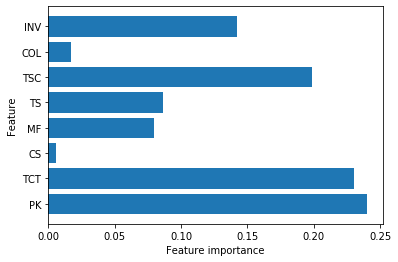

In [28]:
plot_feature_importances(rnd_clf)

In [30]:
ann_clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(10,1), random_state=1)
ann_clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [ ]:
print(rnd_clf.feature_importances_)

In [37]:
X=p2005[['PK','TCT','CS','MF','TS','TSC','COL','INV']]
y=p2005['Category FC5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


#CLASSIFIERS
ann_clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(10, 1), random_state=1)
ann_clf.fit(X_train, y_train)

rnd_clf = RandomForestClassifier(n_estimators=100, max_depth=20,n_jobs=-1, random_state=0)
rnd_clf.fit(X_train, y_train)

print("FC5")
y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)
print(rnd_clf.__class__.__name__,":",accuracy_score(y_test, y_pred))

y_pred = ann_clf.predict(X_test)
print(ann_clf.__class__.__name__,":",accuracy_score(y_test, y_pred))

FC5
RandomForestClassifier : 0.6617375231053605
MLPClassifier : 0.6876155268022182


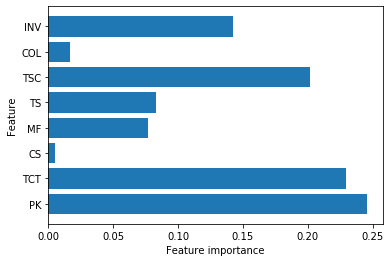

In [32]:
plot_feature_importances(rnd_clf)

In [38]:
X=p2005[['PK','TCT','CS','MF','TS','TSC','COL','INV']]
y=p2005['Category FC3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#CLASSIFIERS
ann_clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(10, 1), random_state=1)
ann_clf.fit(X_train, y_train)
rnd_clf = RandomForestClassifier(n_estimators=100, max_depth=20,n_jobs=-1, random_state=0)
rnd_clf.fit(X_train, y_train)

print("FC10")
y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)
print(rnd_clf.__class__.__name__,":",accuracy_score(y_test, y_pred))

y_pred = ann_clf.predict(X_test)
print(ann_clf.__class__.__name__,":",accuracy_score(y_test, y_pred))

FC10
RandomForestClassifier : 0.8927911275415896
MLPClassifier : 0.9020332717190388


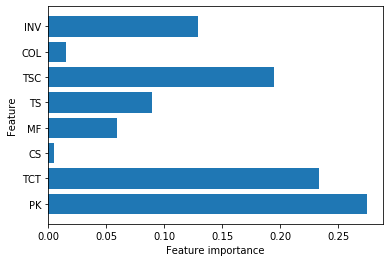

In [39]:
plot_feature_importances(rnd_clf)